In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
rides = pd.read_csv('day.csv')
videos = pd.read_csv('transcoding_mesurment.tsv',sep='\t')

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
videos.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


## Q1

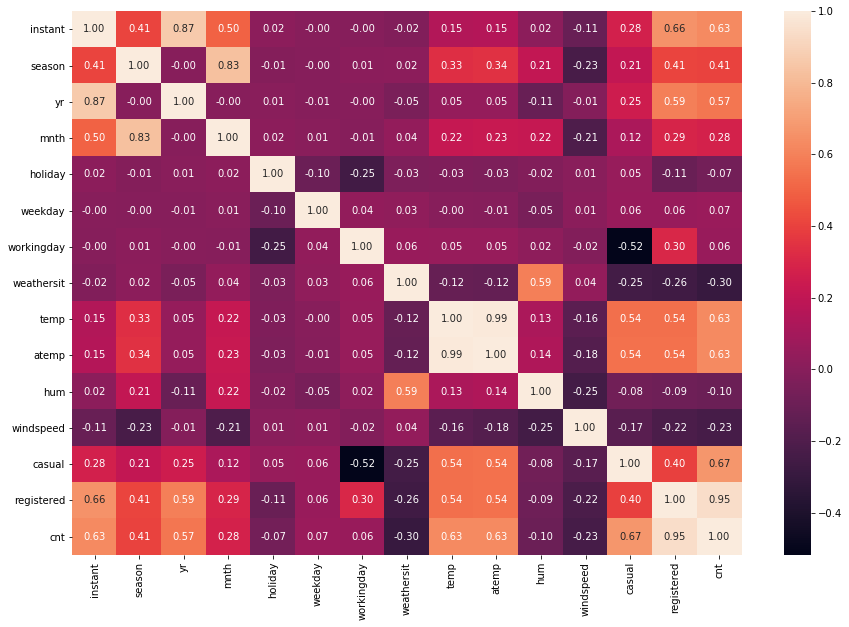

In [5]:
rides_corr = rides.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(rides_corr,annot=True,fmt='.2f')

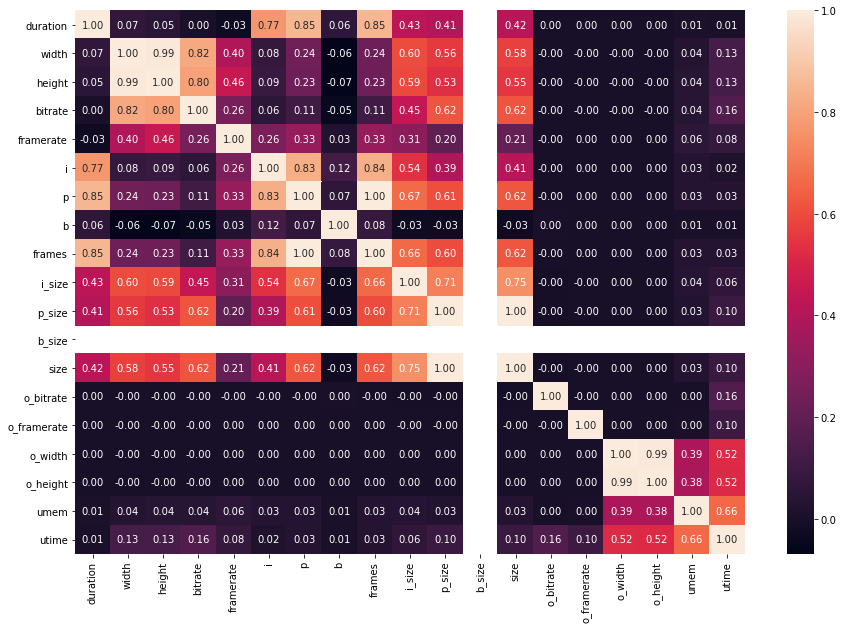

In [6]:
videos_corr = videos.corr(method='pearson')

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(videos_corr,annot=True,fmt='.2f')

The three target variables for the bike sharing dataset are count of casual users, count of registered users and total number of users. All these three target variables have high positive correlation with the normalized temperature and feeling normalized temperature. Which means higher the temperature on a particular day, more the number of users that day. 

## Q2

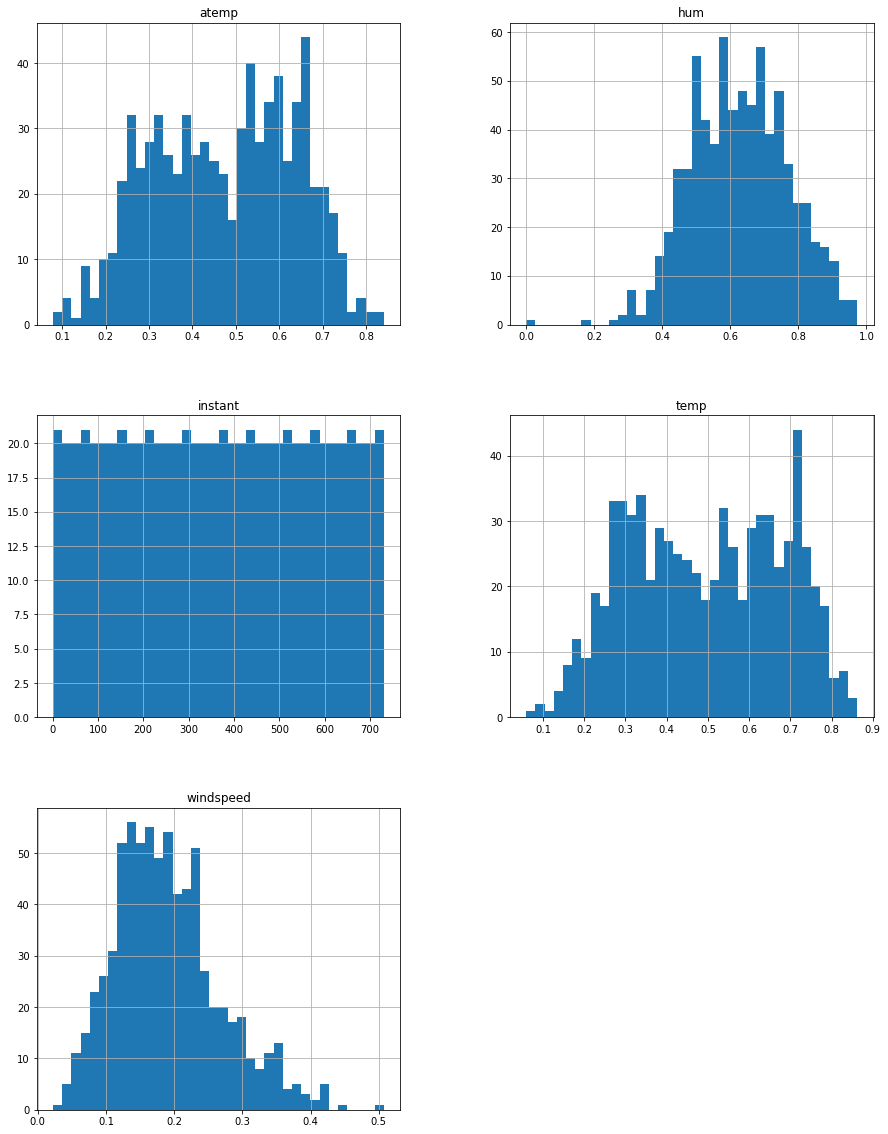

In [7]:
rides['dteday'] = pd.to_datetime(rides.dteday)

# categorical variables
rides['season'] = rides.season.astype('category')
rides['holiday'] = rides.holiday.astype('category')
rides['weekday'] = rides.weekday.astype('category')
rides['weathersit'] = rides.weathersit.astype('category')
rides['workingday'] = rides.workingday.astype('category')
rides['mnth'] = rides.mnth.astype('category')
rides['yr'] = rides.yr.astype('category')

numerical_features_rides = ['instant','temp','atemp','hum','windspeed']

hist = rides[numerical_features_rides].hist(bins=36,figsize=(15,20))

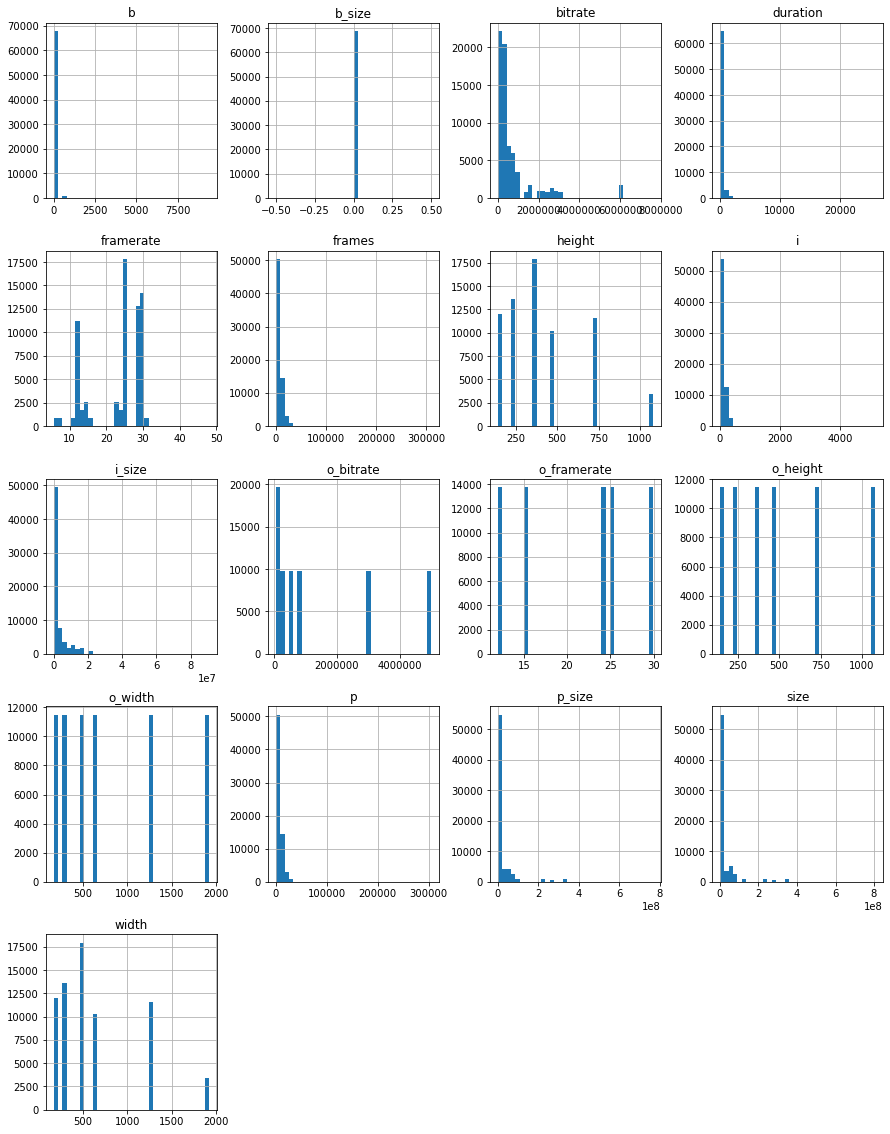

In [8]:
videos['codec'] = videos.codec.astype('category')
videos['o_codec'] = videos.o_codec.astype('category')

numerical_features_videos = videos.columns.drop(['codec','o_codec','utime','umem'])
hist = videos[numerical_features_videos].hist(bins=36,figsize=(15,20))

If the distribution of a feature has high skewness, we can use some transformation like a logarithmic transformation to reduce the skewness of the feature

## Q3

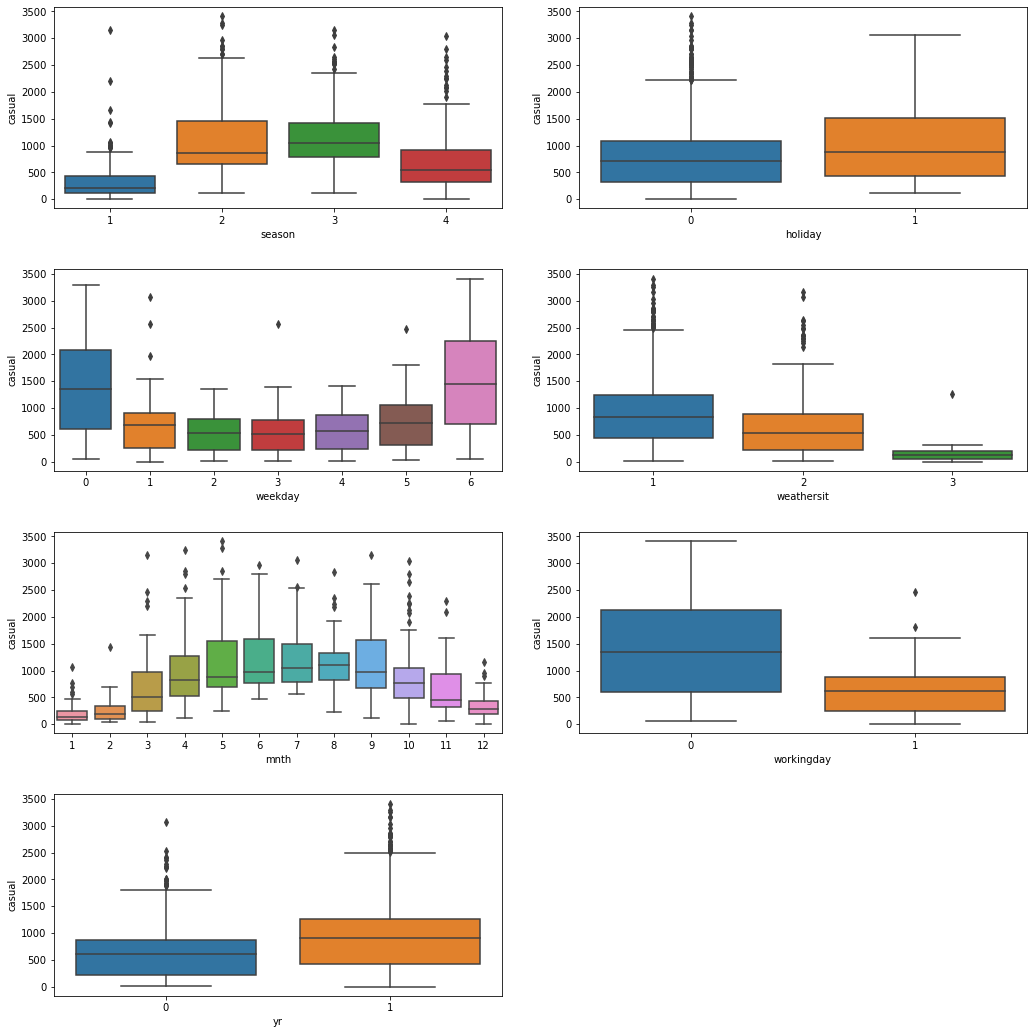

In [9]:
#categorical features vs casual
categorical_features_rides = ['season','holiday','weekday','weathersit','mnth','workingday','yr']
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['casual',col]],x=col,y='casual',ax=ax)
    
fig.tight_layout(pad=3.0)

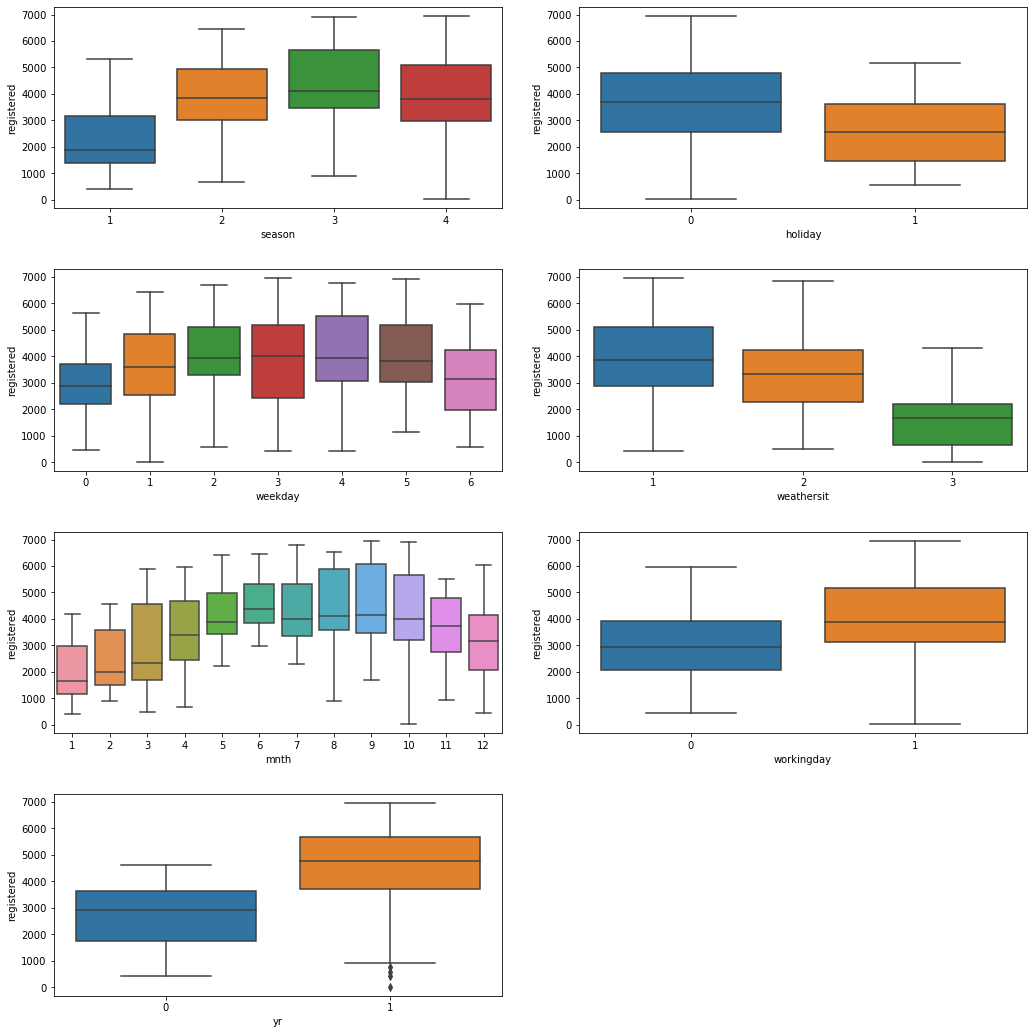

In [10]:
#categorical features vs registered
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['registered',col]],x=col,y='registered',ax=ax)
    
fig.tight_layout(pad=3.0)

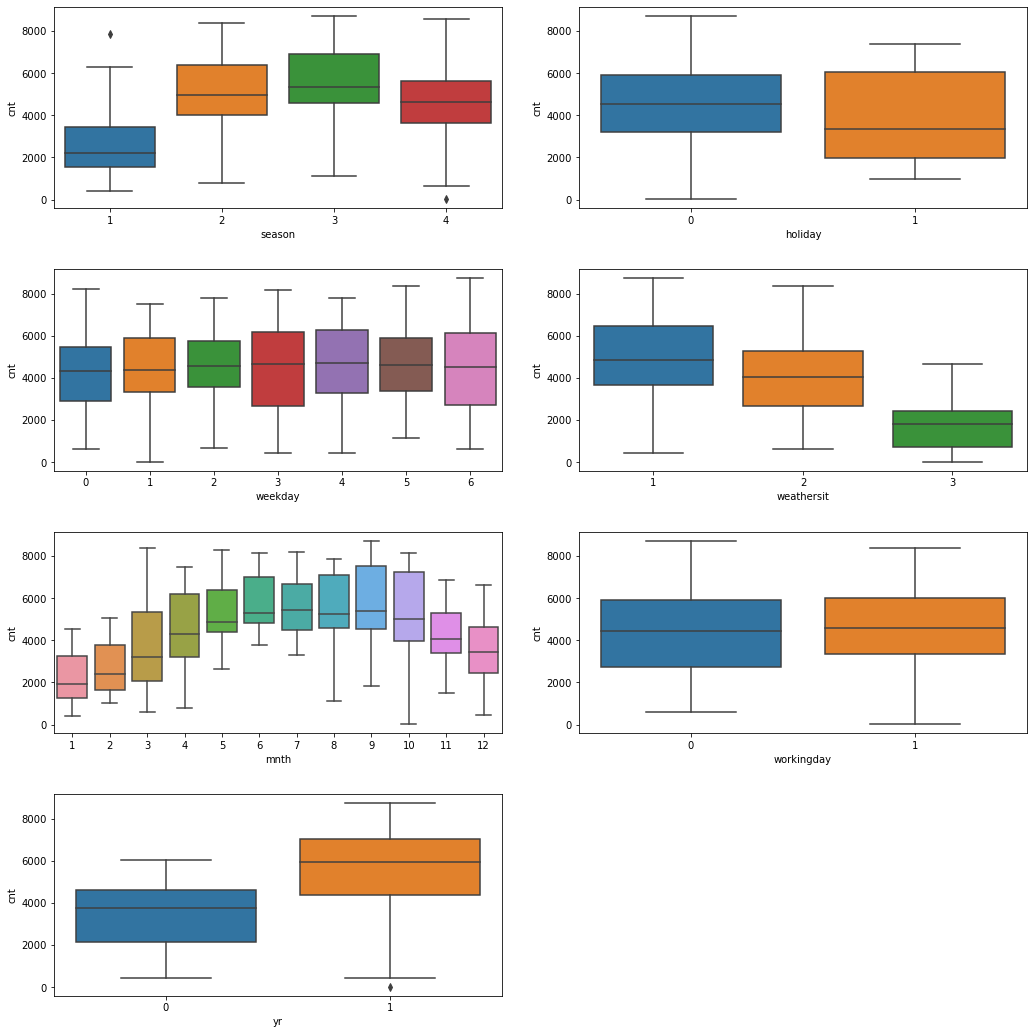

In [11]:
#categorical features vs cnt
fig, axes = plt.subplots(nrows=4,ncols=2,squeeze=False)
axes_flatten = axes.flatten()
ax_rm = axes_flatten[-1]
ax_rm.remove()

fig.set_figheight(15)
fig.set_figwidth(15)
for ax,col in zip(axes_flatten,categorical_features_rides):
    sns.boxplot(data=rides[['cnt',col]],x=col,y='cnt',ax=ax)
    
fig.tight_layout(pad=3.0)

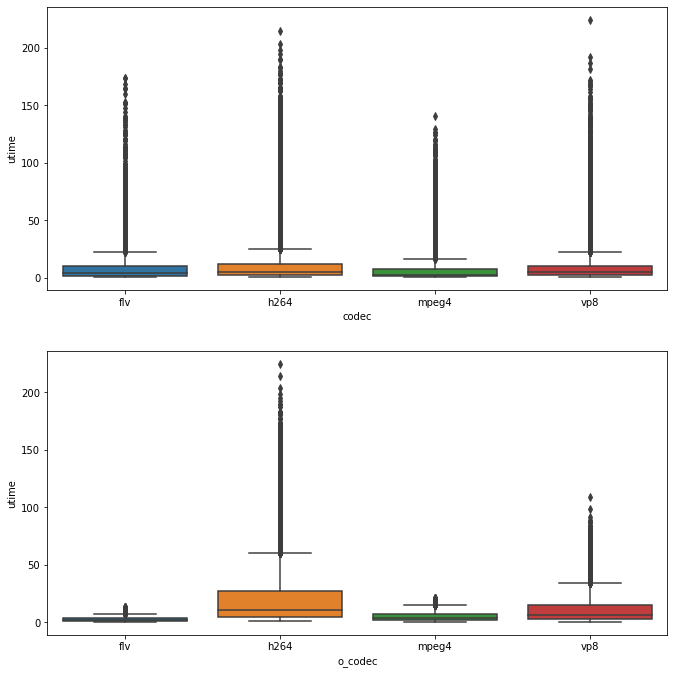

In [12]:
#categorical features vs utime

categorical_features_videos = ['codec','o_codec']

fig, axes = plt.subplots(nrows=2,ncols=1,squeeze=False)
axes_flatten = axes.flatten()

fig.set_figheight(10)
fig.set_figwidth(10)
for ax,col in zip(axes_flatten,categorical_features_videos):
    sns.boxplot(data=videos[['utime',col]],x=col,y='utime',ax=ax)
    
fig.tight_layout(pad=3.0)

## Q4

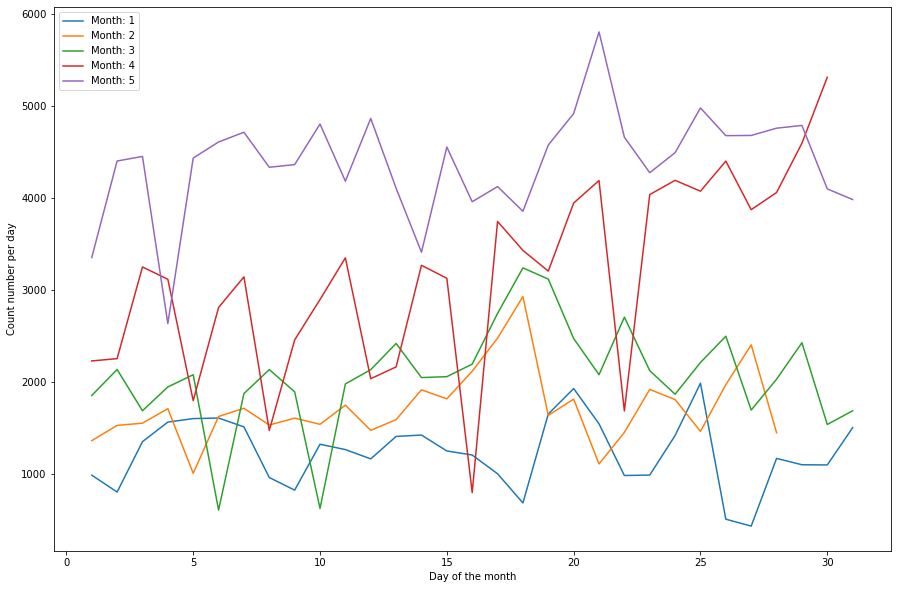

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
for i in range(1,6):
    get = rides.loc[(rides['mnth']==i) & (rides['yr']==0)]['cnt']
    ax.plot(np.arange(1,len(get)+1),get, label='Month: ' + str(i))

ax.set(xlabel='Day of the month', ylabel='Count number per day')
    
ax.legend()
plt.show()

## Q5

Mean transcoding time = 9.996 seconds
Median transcoding time = 4.408 seconds


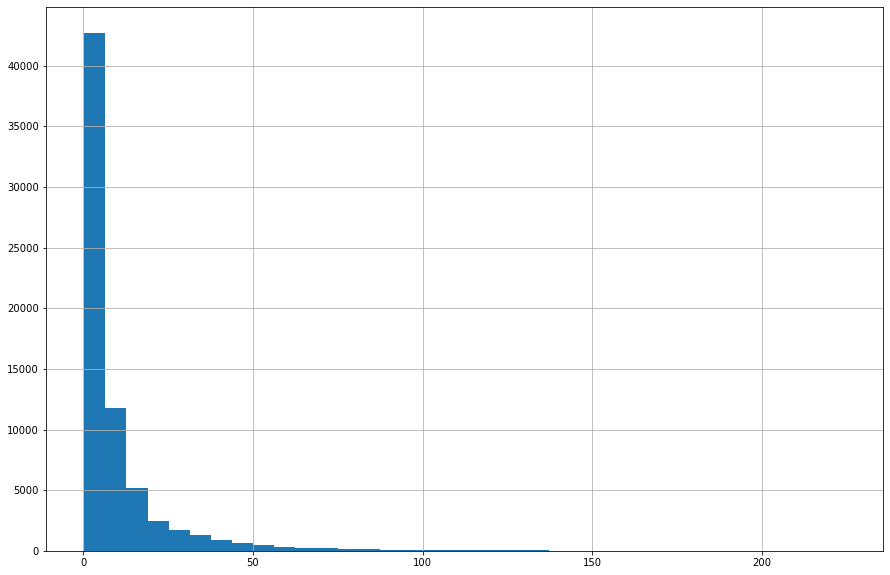

In [14]:
hist = videos['utime'].hist(bins=36,figsize=(15,10))
trns_mean = np.mean(videos['utime'])
trns_median = np.median(videos['utime'])

print('Mean transcoding time = {0:.3f} seconds'.format(trns_mean))
print('Median transcoding time = {0:.3f} seconds'.format(trns_median))

The transcoding time is positively skewed distribution as mean > median.

## Q6

Solution: The scalar encoding can be used where the categorical features have a natural ordering of values. For example in the categorical feature of 'Quality' with values {Poor, Fair, Typical, Good, Excellent}, using scalar encoding with integers from 1 through 5 also retains the information of how good the quality is in terms of magnitude of the number. Machine learning algorithms may be able to understand and harness this relationship. While, by using the one-hot encoding we lose the information of the natural ordering of values. In contrast, using the scalar encoding for categorical variables where no such ordinal relationship exists may result in poor performance or unexpected results. Thus, in such cases it is better to use one hot encoding which does not assume any such ordinal relationship.

Preprocessing the categorical data

In [15]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
categorical_rides = ['holiday','workingday','weathersit']
rides_encode = pd.get_dummies(data = rides, prefix = None, prefix_sep='_',columns = categorical_rides, drop_first=False)

In [17]:
rides_encode.head()

,instant,dteday,season,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,1,0,0,1,0
1,2,2011-01-02,1,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,1,0,0,1,0
2,3,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,1,1,0,0
3,4,2011-01-04,1,0,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,1,1,0,0
4,5,2011-01-05,1,0,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,1,1,0,0


In [18]:
ridesStandard = rides_encode.drop(columns='dteday', inplace=False)

standard_columns_rides = ['instant','season','yr','mnth','weekday','temp','atemp','hum','windspeed']
standard_scaler = preprocessing.StandardScaler()
ridesStandard[standard_columns_rides] = standard_scaler.fit_transform(ridesStandard[standard_columns_rides])

In [19]:
ridesStandard.head()

,instant,season,yr,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,-1.729683,-1.348213,-1.001369,-1.600161,1.498809,-0.826662,-0.679946,1.250171,-0.387892,331,654,985,1,0,1,0,0,1,0
1,-1.724944,-1.348213,-1.001369,-1.600161,-1.496077,-0.721095,-0.740652,0.479113,0.749602,131,670,801,1,0,1,0,0,1,0
2,-1.720205,-1.348213,-1.001369,-1.600161,-0.996930,-1.634657,-1.749767,-1.339274,0.746632,120,1229,1349,1,0,0,1,1,0,0
3,-1.715466,-1.348213,-1.001369,-1.600161,-0.497782,-1.614780,-1.610270,-0.263182,-0.389829,108,1454,1562,1,0,0,1,1,0,0
4,-1.710728,-1.348213,-1.001369,-1.600161,0.001366,-1.467414,-1.504971,-1.341494,-0.046307,82,1518,1600,1,0,0,1,1,0,0


Text(0.5, 1.0, 'Mutual Information between each feature and total count')

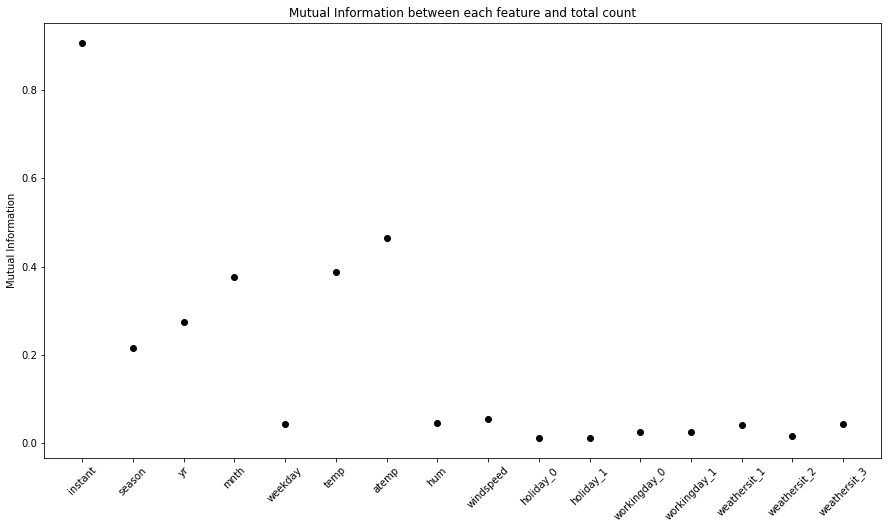

In [20]:
X_rides = ridesStandard.drop(columns=['casual','registered','cnt'])
Y_rides = ridesStandard['cnt']

mi_rides = mutual_info_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,mi_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and total count')

Text(0.5, 1.0, 'F scores between each feature and total count')

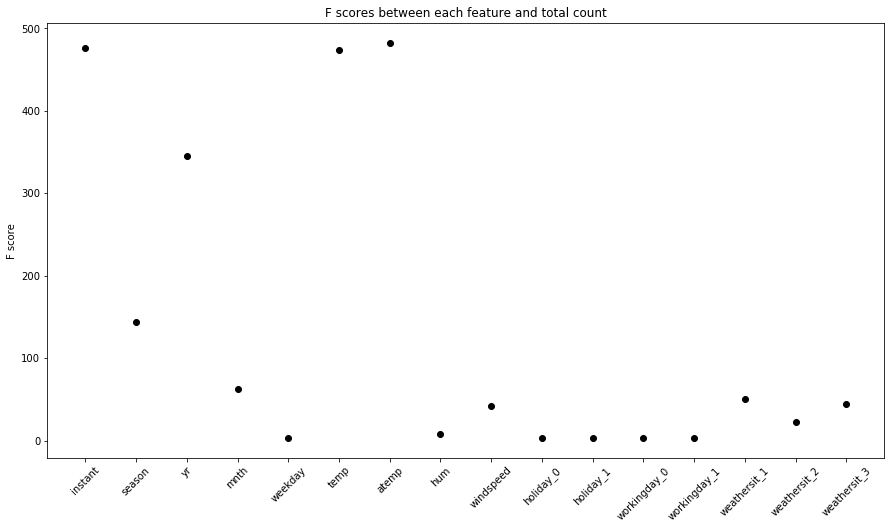

In [21]:
fval_rides, _ = f_regression(X=X_rides,y=Y_rides)

plt.figure(figsize = (15,8))
plt.plot(X_rides.columns,fval_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and total count')

In [22]:
categorical_videos = ['codec','o_codec']
videos_encode = pd.get_dummies(data = videos, prefix = None, prefix_sep='_',columns = categorical_videos, drop_first=False)

In [23]:
videos_encode.head()

,id,duration,width,height,bitrate,framerate,i,p,b,frames,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,22508,0.612,0,0,1,0,0,0,1,0
1,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,25164,0.980,0,0,1,0,0,0,1,0
2,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,29228,1.216,0,0,1,0,0,0,1,0
3,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,34316,1.692,0,0,1,0,0,0,1,0
4,04t6-jw9czg,130.35667,176,144,54590,12.0,27,1537,0,1564,...,58528,3.456,0,0,1,0,0,0,1,0


In [24]:
videos_encode_ds = videos_encode.sample(n=5000,random_state=42)
videosStandard = videos_encode.drop(columns='id', inplace=False)
videosStandard_ds = videos_encode_ds.drop(columns='id', inplace=False)

standard_columns_videos = videosStandard_ds.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime','umem'])
standard_scaler = preprocessing.StandardScaler()
videosStandard_ds[standard_columns_videos] = standard_scaler.fit_transform(videosStandard_ds[standard_columns_videos])

In [25]:
videosStandard_ds.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
64402,-0.312494,-0.66104,-0.722037,-0.410263,0.797146,0.035026,-0.096219,-0.07142,-0.096343,-0.465168,...,221160,2.728,1,0,0,0,1,0,0,0
39863,0.764532,-0.31467,-0.221997,-0.355353,0.242634,1.880030,0.910081,-0.07142,0.922180,-0.327497,...,219480,46.167,0,1,0,0,0,0,0,1
40898,-0.059702,0.03170,0.278042,-0.038542,0.944502,-0.147047,0.246217,-0.07142,0.239270,-0.220043,...,219480,2.096,0,0,0,1,1,0,0,0
29064,-0.137042,-0.66104,-0.722037,-0.487799,0.797146,0.326342,0.135850,-0.07142,0.136726,-0.464417,...,218900,0.708,0,1,0,0,1,0,0,0
26550,0.366743,0.03170,0.278042,-0.044415,0.797146,1.260983,0.794714,-0.07142,0.799885,-0.005231,...,217828,1.504,0,1,0,0,1,0,0,0


Text(0.5, 1.0, 'Mutual Information between each feature and transcoding time')

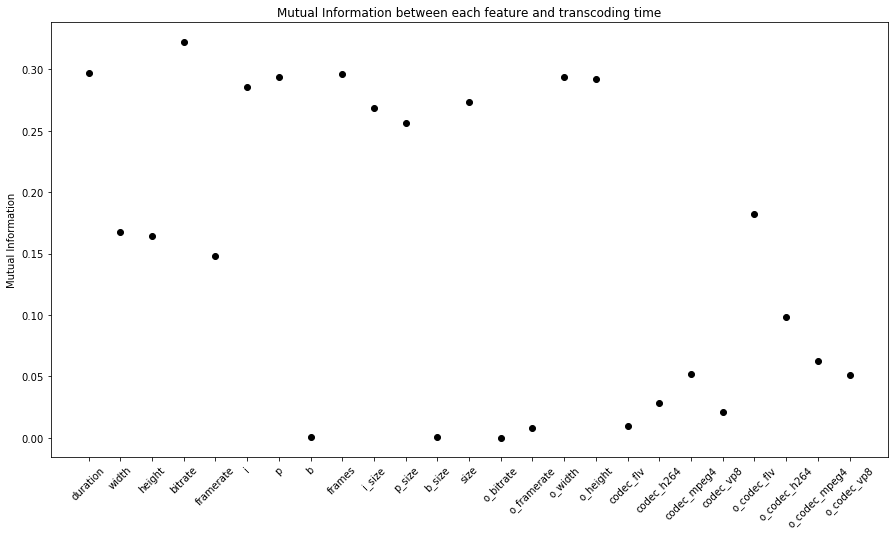

In [26]:
X_videos_ds = videosStandard_ds.drop(columns=['utime','umem'])
Y_videos_ds = videosStandard_ds['utime']

X_videos_columns = X_videos_ds.columns

mi_videos = mutual_info_regression(X=X_videos_ds,y=Y_videos_ds)

plt.figure(figsize = (15,8))
plt.plot(X_videos_ds.columns,mi_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('Mutual Information')
plt.title('Mutual Information between each feature and transcoding time')

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda3\envs\ece219_3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'F scores between each feature and transcoding time')

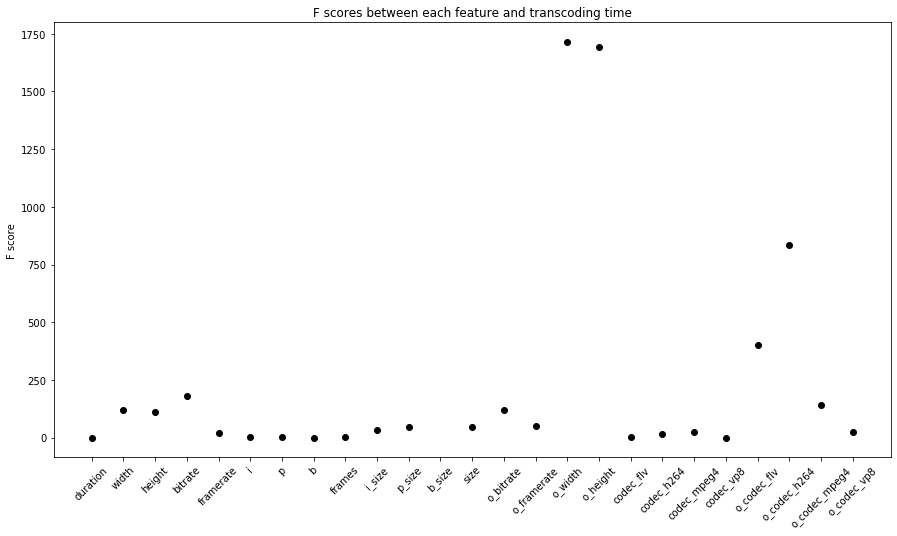

In [27]:
fval_videos, _ = f_regression(X=X_videos_ds,y=Y_videos_ds)

plt.figure(figsize = (15,8))
plt.plot(X_videos_ds.columns,fval_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('F score')
plt.title('F scores between each feature and transcoding time')

In [28]:
#Feature Selection

rides_features_drop = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','casual','registered','cnt']
X_ridesFinal = ridesStandard.drop(columns=rides_features_drop)
y_ridesFinal = ridesStandard['cnt']

In [29]:
X_ridesFinal.head()

,instant,season,yr,mnth,temp,atemp
0,-1.729683,-1.348213,-1.001369,-1.600161,-0.826662,-0.679946
1,-1.724944,-1.348213,-1.001369,-1.600161,-0.721095,-0.740652
2,-1.720205,-1.348213,-1.001369,-1.600161,-1.634657,-1.749767
3,-1.715466,-1.348213,-1.001369,-1.600161,-1.614780,-1.610270
4,-1.710728,-1.348213,-1.001369,-1.600161,-1.467414,-1.504971


In [30]:
videos_features_drop = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','umem']
X_videosFinal = videosStandard_ds.drop(columns=videos_features_drop)
y_videosFinal = videosStandard_ds['utime']

In [31]:
X_videosFinal.head()

,duration,width,height,bitrate,framerate,i,p,frames,i_size,p_size,size,o_width,o_height,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
64402,-0.312494,-0.66104,-0.722037,-0.410263,0.797146,0.035026,-0.096219,-0.096343,-0.465168,-0.330135,-0.347876,0.799593,0.701877,1,0,0,0
39863,0.764532,-0.31467,-0.221997,-0.355353,0.242634,1.880030,0.910081,0.922180,-0.327497,-0.100612,-0.120848,1.858950,1.852419,0,0,0,1
40898,-0.059702,0.03170,0.278042,-0.038542,0.944502,-0.147047,0.246217,0.239270,-0.220043,-0.038054,-0.053416,-0.524605,-0.448666,1,0,0,0
29064,-0.137042,-0.66104,-0.722037,-0.487799,0.797146,0.326342,0.135850,0.136726,-0.464417,-0.355506,-0.371703,-1.027799,-1.138991,1,0,0,0
26550,0.366743,0.03170,0.278042,-0.044415,0.797146,1.260983,0.794714,0.799885,-0.005231,0.119113,0.111616,-1.027799,-1.138991,1,0,0,0


Training Test Dataset split

In [32]:
x_train_rides, x_test_rides, y_train_rides, y_test_rides = train_test_split(X_ridesFinal, y_ridesFinal, test_size = 0.33, random_state = 42)

In [33]:
x_train_videos, x_test_videos, y_train_videos, y_test_videos = train_test_split(X_videosFinal, y_videosFinal, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE for bike sharing dataset:  1044.2321347295203
Ridge regression RMSE:  996.0588535359865  alpha:  17.47528400007683
Lasso regression RMSE:  1001.2589473037746  alpha:  13.219411484660288


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha for Bike sharing dataset')

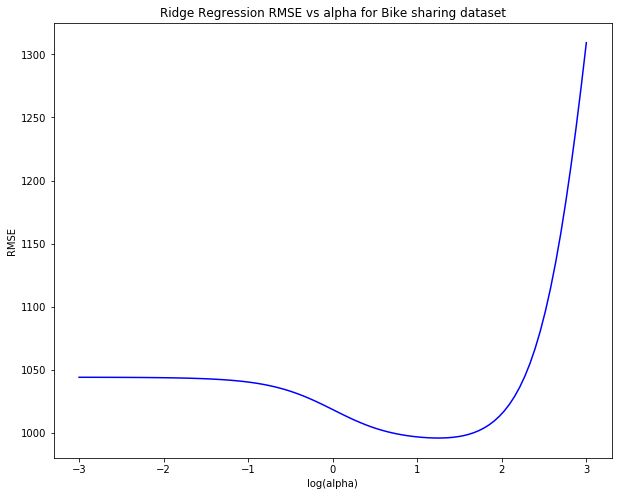

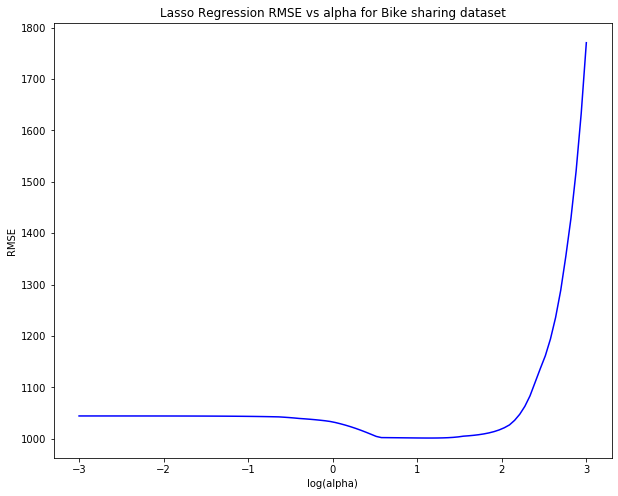

In [34]:
# For bike sharing data

from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train_rides, y_train_rides)
y_predict_rides = lr.predict(x_test_rides)
rmselr_rides = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
print('No normalization Linear regression RMSE for bike sharing dataset: ', rmselr_rides)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_rides = np.zeros_like(alpha_array)
rmsell_rides = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides, y_train_rides)
    y_predict_rides = rr.predict(x_test_rides)
    rmserr_rides[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides, y_train_rides)
    y_predict_rides = ll.predict(x_test_rides)
    rmsell_rides[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)
    
idxrr_min = np.argmin(rmserr_rides)
rmsebestrr_rides = rmserr_rides[idxrr_min]
Alphabestrr_rides = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_rides)
rmsebestll_rides = rmsell_rides[idxll_min]
Alphabestll_rides = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_rides, ' alpha: ', Alphabestrr_rides)
print('Lasso regression RMSE: ', rmsebestll_rides, ' alpha: ', Alphabestll_rides)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_rides,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha for Bike sharing dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_rides,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha for Bike sharing dataset')

No normalization Linear regression RMSE for video transcoding dataset:  11.06776664625024
Ridge regression RMSE:  11.059109465326225  alpha:  2.1544346900318843
Lasso regression RMSE:  11.051110442748087  alpha:  0.08697490026177834


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha for video transcoding dataset')

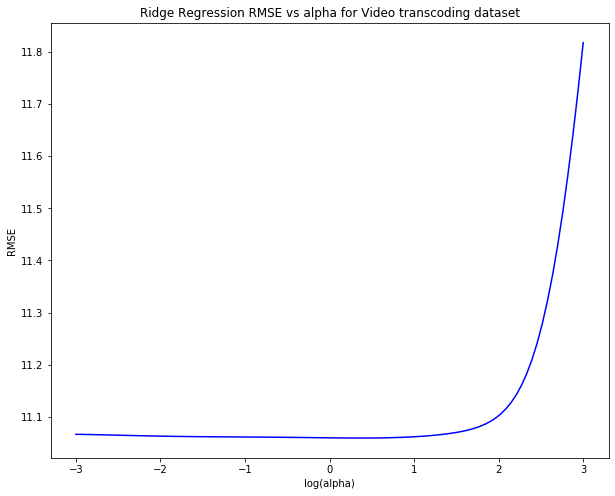

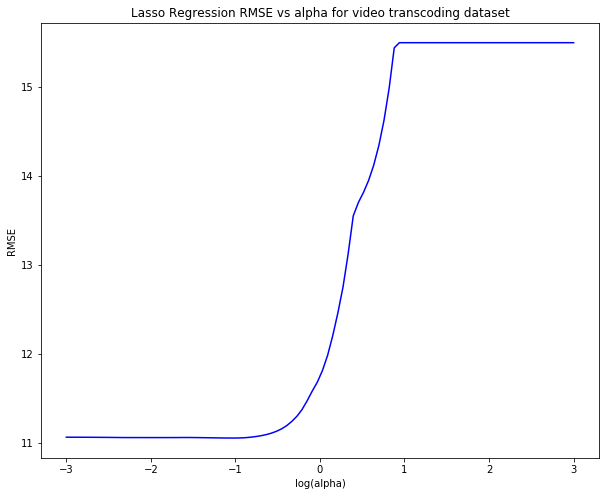

In [35]:
# Video dataset
lr = LinearRegression()
lr.fit(x_train_videos, y_train_videos)
y_predict_videos = lr.predict(x_test_videos)
rmselr_videos = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
print('No normalization Linear regression RMSE for video transcoding dataset: ', rmselr_videos)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_videos = np.zeros_like(alpha_array)
rmsell_videos = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos, y_train_videos)
    y_predict_videos = rr.predict(x_test_videos)
    rmserr_videos[it] = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos, y_train_videos)
    y_predict_videos = ll.predict(x_test_videos)
    rmsell_videos[it] = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)
    
idxrr_min = np.argmin(rmserr_videos)
rmsebestrr_videos = rmserr_videos[idxrr_min]
Alphabestrr_videos = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_videos)
rmsebestll_videos = rmsell_videos[idxll_min]
Alphabestll_videos = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_videos, ' alpha: ', Alphabestrr_videos)
print('Lasso regression RMSE: ', rmsebestll_videos, ' alpha: ', Alphabestll_videos)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_videos,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha for Video transcoding dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_videos,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha for video transcoding dataset')

In [36]:
# Without Feature Scaling Bike Sharing Dataset

rides_features_drop_wfs = ['weekday','hum','windspeed','holiday_0','holiday_1','workingday_0','workingday_1','weathersit_1','weathersit_2','weathersit_3','casual','registered','cnt','dteday']
X_ridesFinal_wfs = rides_encode.drop(columns=rides_features_drop_wfs)
y_ridesFinal_wfs = rides_encode['cnt']

x_train_rides_wfs, x_test_rides_wfs, y_train_rides_wfs, y_test_rides_wfs = train_test_split(X_ridesFinal_wfs, y_ridesFinal_wfs, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE for bike sharing dataset:  1044.2321347295208
Ridge regression RMSE:  992.7969743255723  alpha:  2.848035868435802
Lasso regression RMSE:  992.0811351563601  alpha:  17.47528400007683


Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha without feature scaling for Bike sharing dataset')

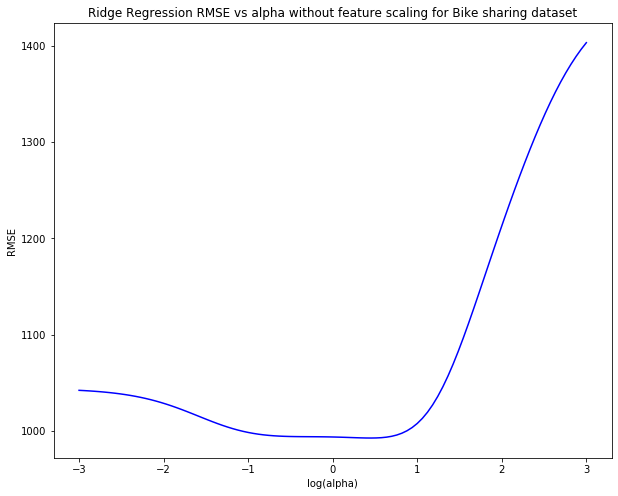

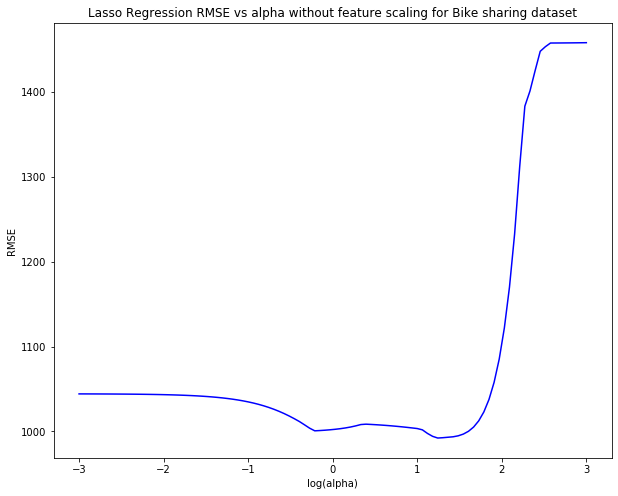

In [37]:
lr = LinearRegression()
lr.fit(x_train_rides_wfs, y_train_rides_wfs)
y_predict_rides_wfs = lr.predict(x_test_rides_wfs)
rmselr_rides_wfs = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
print('No normalization Linear regression RMSE for bike sharing dataset: ', rmselr_rides_wfs)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_rides_wfs = np.zeros_like(alpha_array)
rmsell_rides_wfs = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_rides_wfs, y_train_rides_wfs)
    y_predict_rides_wfs = rr.predict(x_test_rides_wfs)
    rmserr_rides_wfs[it] = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)

    ll = Lasso(alpha = alpha, max_iter=10e5)
    ll.fit(x_train_rides_wfs, y_train_rides_wfs)
    y_predict_rides_wfs = ll.predict(x_test_rides_wfs)
    rmsell_rides_wfs[it] = mean_squared_error(y_true= y_test_rides_wfs,y_pred= y_predict_rides_wfs, squared = False)
    
idxrr_min = np.argmin(rmserr_rides_wfs)
rmsebestrr_rides_wfs = rmserr_rides_wfs[idxrr_min]
Alphabestrr_rides_wfs = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_rides_wfs)
rmsebestll_rides_wfs = rmsell_rides_wfs[idxll_min]
Alphabestll_rides_wfs = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_rides_wfs, ' alpha: ', Alphabestrr_rides_wfs)
print('Lasso regression RMSE: ', rmsebestll_rides_wfs, ' alpha: ', Alphabestll_rides_wfs)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_rides_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha without feature scaling for Bike sharing dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_rides_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha without feature scaling for Bike sharing dataset')

In [38]:
# Without Feature Scaling Video Dataset
videos_features_drop_wfs = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','id','umem']
X_videosFinal_wfs = videos_encode_ds.drop(columns=videos_features_drop_wfs)
y_videosFinal_wfs = videos_encode_ds['utime']

x_train_videos_wfs, x_test_videos_wfs, y_train_videos_wfs, y_test_videos_wfs = train_test_split(X_videosFinal_wfs, y_videosFinal_wfs, test_size = 0.33, random_state = 42)

No normalization Linear regression RMSE for video transcoding dataset:  11.067766646250174


C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.06851e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198054.74194209813, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82756e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198066.788678322, tolerance: 76.95765867803549
  model = cd_fast.enet_

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198722.65631919252, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.4348e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198834.32615211708, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.2487e-22): result may not be accurate.
  return linalg.solve(A

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205752.90784830347, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82756e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206871.11006417812, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.70027e-21): result may not be accurate.
  return linalg.solve

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254294.43482608494, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.24868e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258796.11378843157, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.18446e-20): result may not be accurate.
  return linalg.solve

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272495.3704693485, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.7e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266539.34050415177, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.70333e-19): result may not be accurate.
  return linalg.solve(A, X

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67940.54286299052, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.18178e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57001.735193225264, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.25692e-18): result may not be accurate.
  return linalg.solve(

Ridge regression RMSE:  11.067766693707734  alpha:  0.001
Lasso regression RMSE:  11.062181678014  alpha:  0.016297508346206444


C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1155.112466534716, tolerance: 76.95765867803549
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33102e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.82955e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.40268e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\linear_model\_r

Text(0.5, 1.0, 'Lasso Regression RMSE vs alpha without feature scaling for video transcoding dataset')

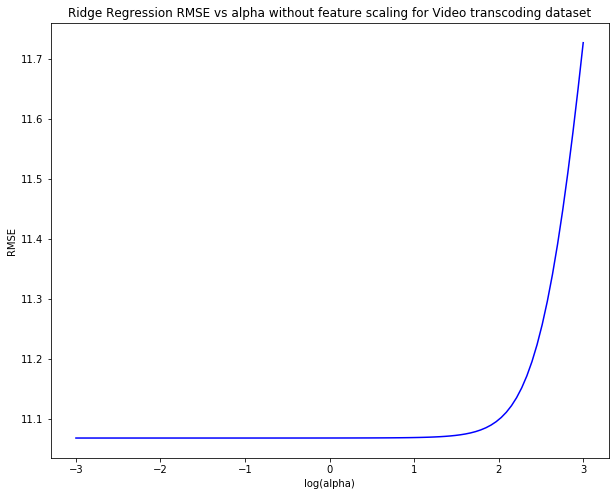

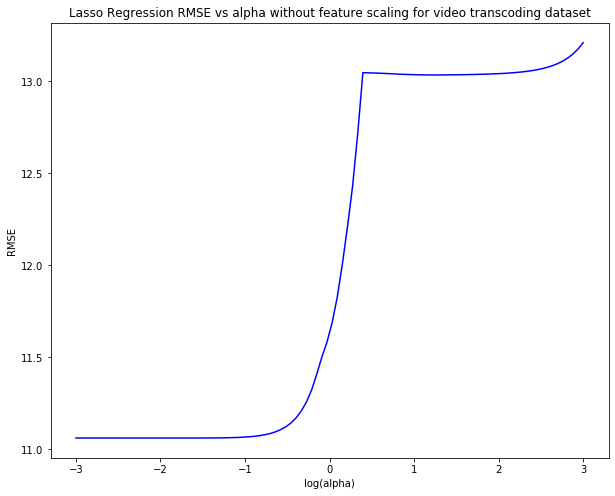

In [39]:
lr = LinearRegression()
lr.fit(x_train_videos_wfs, y_train_videos_wfs)
y_predict_videos_wfs = lr.predict(x_test_videos_wfs)
rmselr_videos_wfs = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
print('No normalization Linear regression RMSE for video transcoding dataset: ', rmselr_videos_wfs)

iter_num = 100
alpha_array = np.logspace(-3,3,num = iter_num)
rmserr_videos_wfs = np.zeros_like(alpha_array)
rmsell_videos_wfs = np.zeros_like(alpha_array)
for (it,alpha) in zip(np.arange(iter_num),alpha_array):
    rr = Ridge(alpha=alpha) #  comparison with alpha value
    rr.fit(x_train_videos_wfs, y_train_videos_wfs)
    y_predict_videos_wfs = rr.predict(x_test_videos_wfs)
    rmserr_videos_wfs[it] = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)

    ll = Lasso(alpha = alpha, max_iter=1e5)
    ll.fit(x_train_videos_wfs, y_train_videos_wfs)
    y_predict_videos_wfs = ll.predict(x_test_videos_wfs)
    rmsell_videos_wfs[it] = mean_squared_error(y_true= y_test_videos_wfs,y_pred= y_predict_videos_wfs, squared = False)
    
idxrr_min = np.argmin(rmserr_videos_wfs)
rmsebestrr_videos_wfs = rmserr_videos_wfs[idxrr_min]
Alphabestrr_videos_wfs = alpha_array[idxrr_min]

idxll_min = np.argmin(rmsell_videos_wfs)
rmsebestll_videos_wfs = rmsell_videos_wfs[idxll_min]
Alphabestll_videos_wfs = alpha_array[idxll_min]
    
print('Ridge regression RMSE: ', rmsebestrr_videos_wfs, ' alpha: ', Alphabestrr_videos_wfs)
print('Lasso regression RMSE: ', rmsebestll_videos_wfs, ' alpha: ', Alphabestll_videos_wfs)

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmserr_videos_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Ridge Regression RMSE vs alpha without feature scaling for Video transcoding dataset')

plt.figure(figsize = (10,8))
plt.plot(np.log10(alpha_array),rmsell_videos_wfs,'b')
plt.ylabel('RMSE')
plt.xlabel('log(alpha)')
plt.title('Lasso Regression RMSE vs alpha without feature scaling for video transcoding dataset')

Text(0.5, 1.0, 'p-value of each feature for Bike Sharing Dataset')

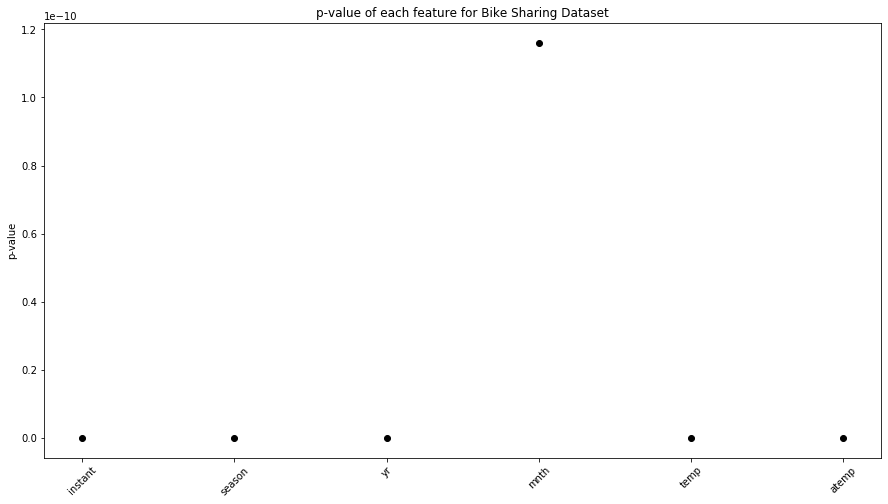

In [40]:
#p-values bike sharing dataset
from scipy import stats

features_rides = x_train_rides.columns
p_values_rides = []

for col in features_rides:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train_rides[col], y_train_rides)
    p_values_rides.append(p_value)
    
plt.figure(figsize = (15,8))
plt.plot(x_train_rides.columns,p_values_rides,'ko')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('p-value of each feature for Bike Sharing Dataset')

Text(0.5, 1.0, 'p-value of each feature for Bike Sharing Dataset')

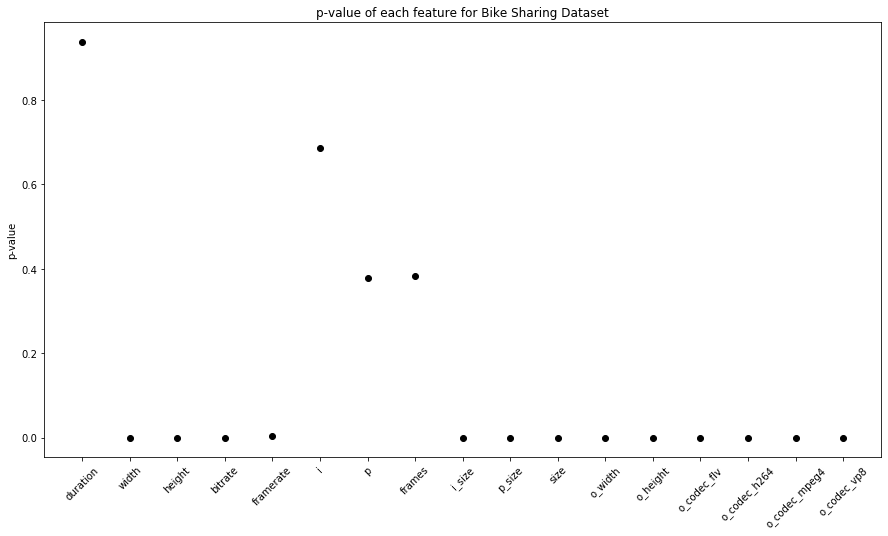

In [41]:
#p-values videos dataset

features_videos = x_train_videos.columns
p_values_videos = []

for col in features_videos:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_train_videos[col], y_train_videos)
    p_values_videos.append(p_value)
    
plt.figure(figsize = (15,8))
plt.plot(x_train_videos.columns,p_values_videos,'ko')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('p-value of each feature for Bike Sharing Dataset')

## Q13-14
Polynomial Regression

Polynomial Regression RMSE:  879  degree:  3


Text(0.5, 1.0, 'Polynomial Regression RMSE vs alpha for Bike sharing dataset')

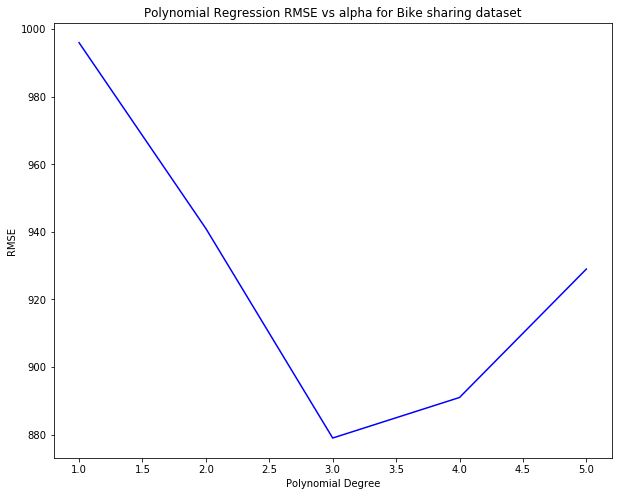

In [42]:
from sklearn.preprocessing import PolynomialFeatures

degrees_rides = np.arange(1,6)

rmserr_rides_poly = np.zeros_like(degrees_rides)
for it,degree in zip(np.arange(len(degrees_rides)),degrees_rides):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_rides_poly = polynomial_features.fit_transform(x_train_rides)
    x_test_rides_poly = polynomial_features.transform(x_test_rides)
    rr = Ridge(alpha=Alphabestrr_rides) #  comparison with alpha value
    rr.fit(x_train_rides_poly, y_train_rides)
    y_predict_rides_poly = rr.predict(x_test_rides_poly)
    rmserr_rides_poly[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides_poly, squared = False)
    
idxrr_min = np.argmin(rmserr_rides_poly)
rmserrbest_rides_poly = rmserr_rides_poly[idxrr_min]
degreerrbest_rides = degrees_rides[idxrr_min]
    
print('Polynomial Regression RMSE: ', rmserrbest_rides_poly, ' degree: ', degreerrbest_rides)

plt.figure(figsize = (10,8))
plt.plot(degrees_rides,rmserr_rides_poly,'b')
plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')
plt.title('Polynomial Regression RMSE vs alpha for Bike sharing dataset')

Polynomial Regression without normalization RMSE:  1044  degree:  1


Text(0.5, 1.0, 'Polynomial Regression without normalization RMSE vs alpha for Bike sharing dataset')

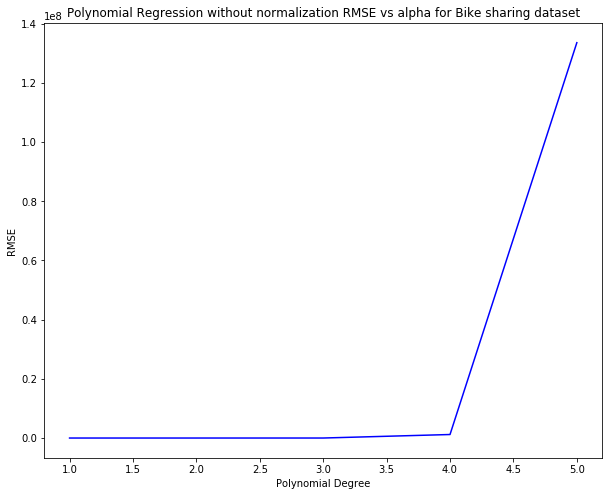

In [43]:
# Without Regularization bike sharing dataset
degrees_rides = np.arange(1,6)

rmselr_rides_poly = np.zeros_like(degrees_rides)
for it,degree in zip(np.arange(len(degrees_rides)),degrees_rides):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_rides_poly = polynomial_features.fit_transform(x_train_rides)
    x_test_rides_poly = polynomial_features.transform(x_test_rides)
    lr = LinearRegression()
    lr.fit(x_train_rides_poly, y_train_rides)
    y_predict_rides_poly = lr.predict(x_test_rides_poly)
    rmselr_rides_poly[it] = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides_poly, squared = False)
    
idxlr_min = np.argmin(rmselr_rides_poly)
rmselrbest_rides_poly = rmselr_rides_poly[idxlr_min]
degreelrbest_rides = degrees_rides[idxlr_min]
    
print('Polynomial Regression without normalization RMSE: ', rmselrbest_rides_poly, ' degree: ', degreelrbest_rides)

plt.figure(figsize = (10,8))
plt.plot(degrees_rides,rmselr_rides_poly,'b')
plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')
plt.title('Polynomial Regression without normalization RMSE vs alpha for Bike sharing dataset')


No regularization causing an increase in the RMSE due to overfitting

Polynomial Regression RMSE:  8  degree:  2


Text(0.5, 1.0, 'Polynomial Regression RMSE vs alpha for Video Transcoding dataset')

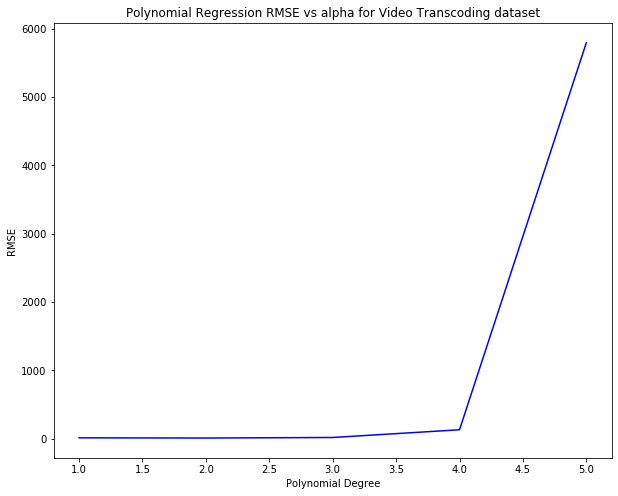

In [44]:
# Video Dataset Polynomial Regression with Ridge

degrees_videos = np.arange(1,6)

rmserr_videos_poly = np.zeros_like(degrees_videos)
for it,degree in zip(np.arange(len(degrees_videos)),degrees_videos):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_videos_poly = polynomial_features.fit_transform(x_train_videos)
    x_test_videos_poly = polynomial_features.transform(x_test_videos)
    rr = Ridge(alpha=Alphabestrr_videos) #  comparison with alpha value
    rr.fit(x_train_videos_poly, y_train_videos)
    y_predict_videos_poly = rr.predict(x_test_videos_poly)
    rmserr_videos_poly[it] = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos_poly, squared = False)
    
idxrr_min = np.argmin(rmserr_videos_poly)
rmserrbest_videos_poly = rmserr_videos_poly[idxrr_min]
degreerrbest_videos = degrees_videos[idxrr_min]
    
print('Polynomial Regression RMSE: ', rmserrbest_videos_poly, ' degree: ', degreerrbest_videos)

plt.figure(figsize = (10,8))
plt.plot(degrees_videos,rmserr_videos_poly,'b')
plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')
plt.title('Polynomial Regression RMSE vs alpha for Video Transcoding dataset')

## Q15
invf1 = (height * width)/bitrate
<br>
invf2 = (o_height * o_width)/o_bitrate

In [45]:
videos_encode_new = videos_encode_ds
videos_encode_new['invf1'] = (videos_encode_ds['height']*videos_encode_ds['width'])/videos_encode_ds['bitrate']
videos_encode_new['invf2'] = (videos_encode_ds['o_height']*videos_encode_ds['o_width'])/videos_encode_ds['o_bitrate']

videosStandard_new = videos_encode_new.drop(columns='id', inplace=False)

standard_columns_videos_new = videosStandard_new.columns.drop(['codec_flv','codec_h264','codec_mpeg4','codec_vp8','o_codec_flv','o_codec_h264','o_codec_mpeg4','o_codec_vp8','utime','umem'])
standard_scaler = preprocessing.StandardScaler()
videosStandard_new[standard_columns_videos_new] = standard_scaler.fit_transform(videosStandard_new[standard_columns_videos_new])

videos_features_drop_new = ['b','b_size','o_bitrate','o_framerate','codec_flv','codec_h264','codec_mpeg4','codec_vp8','utime','umem']
X_videosFinal_new = videosStandard_new.drop(columns=videos_features_drop_new)
y_videosFinal_new = videosStandard_new['utime']

x_train_videos_new, x_test_videos_new, y_train_videos_new, y_test_videos_new = train_test_split(X_videosFinal_new, y_videosFinal_new, test_size = 0.33, random_state = 42)

polynomial_features = PolynomialFeatures(degree=degreerrbest_videos)
x_train_videos_poly_new = polynomial_features.fit_transform(x_train_videos_new)
x_test_videos_poly_new = polynomial_features.transform(x_test_videos_new)
rr = Ridge(alpha=Alphabestrr_videos) #  comparison with alpha value
rr.fit(x_train_videos_poly_new, y_train_videos_new)
y_predict_videos_poly_new = rr.predict(x_test_videos_poly_new)
rmserr_videos_poly_new = mean_squared_error(y_true= y_test_videos_new,y_pred= y_predict_videos_poly_new, squared = False)
        
print('Polynomial Regression RMSE: ', rmserr_videos_poly_new, ' degree: ', degreerrbest_videos)

Polynomial Regression RMSE:  6.7532354258307805  degree:  2


Neural Network

In [46]:
#Bike Sharing Dataset
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(100,),(100,100),(100,100,100)],
             'activation':['identity','logistic','tanh','relu'],
             'alpha':[10,1,1e-1,1e-3,1e-5]}
mlp_rg = MLPRegressor(max_iter=1000000)
clf = GridSearchCV(estimator=mlp_rg,param_grid=parameters,n_jobs=-1,verbose=10)
clf.fit(X_ridesFinal, y_ridesFinal)

mlp_results = pd.DataFrame(clf.cv_results_)
mlp_results = mlp_results.sort_values(by=['mean_test_score'],ascending=False)

mlp_results

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,50.571704,12.626881,0.003590,7.983925e-04,relu,10,"(100, 100)","{'activation': 'relu', 'alpha': 10, 'hidden_la...",0.247523,-0.222078,0.229779,0.095437,0.219161,0.113964,0.176400,1
49,47.522661,13.515293,0.003591,4.880145e-04,relu,1,"(100, 100)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.210205,-0.421350,0.251008,-0.060158,0.121546,0.020250,0.245385,2
14,1.859624,0.308698,0.004188,1.932602e-03,identity,1e-05,"(100, 100, 100)","{'activation': 'identity', 'alpha': 1e-05, 'hi...",0.700183,-0.775460,-0.100408,-0.212926,0.463378,0.014953,0.521654,3
5,1.675517,0.505257,0.007380,9.281809e-03,identity,1,"(100, 100, 100)","{'activation': 'identity', 'alpha': 1, 'hidden...",0.699968,-0.761672,-0.113380,-0.216830,0.466101,0.014837,0.518868,4
7,2.504899,0.384220,0.003390,4.892234e-04,identity,0.1,"(100, 100)","{'activation': 'identity', 'alpha': 0.1, 'hidd...",0.701199,-0.764704,-0.111912,-0.215591,0.464809,0.014760,0.519695,5
0,8.246341,0.472969,0.002994,6.323370e-04,identity,10,"(100,)","{'activation': 'identity', 'alpha': 10, 'hidde...",0.698807,-0.749891,-0.122180,-0.220616,0.463942,0.014013,0.515466,6
10,2.218863,0.371225,0.002992,1.124365e-06,identity,0.001,"(100, 100)","{'activation': 'identity', 'alpha': 0.001, 'hi...",0.700044,-0.765190,-0.113586,-0.215756,0.464131,0.013929,0.519515,7
12,7.593287,0.998315,0.003390,2.327135e-03,identity,1e-05,"(100,)","{'activation': 'identity', 'alpha': 1e-05, 'hi...",0.699541,-0.749941,-0.126332,-0.218832,0.464425,0.013772,0.515821,8
9,8.849523,1.200914,0.002793,3.983511e-04,identity,0.001,"(100,)","{'activation': 'identity', 'alpha': 0.001, 'hi...",0.697162,-0.751277,-0.119728,-0.221948,0.464363,0.013714,0.515508,9
6,8.353652,1.204737,0.002195,3.997124e-04,identity,0.1,"(100,)","{'activation': 'identity', 'alpha': 0.1, 'hidd...",0.699132,-0.752704,-0.122464,-0.220988,0.465165,0.013628,0.516649,10


Activation Function: Relu and Identity seem to do very well
<br>


In [47]:
parameters2_rides = {'hidden_layer_sizes':[(100,),(100,100),(200,),(200,200),(500,),(500,500),(1000,),(1000,1000)],
             'activation':['identity','relu'],
             'alpha':[10,1,1e-1,1e-3,1e-5]}
mlp_rg2_rides = MLPRegressor(max_iter=1000000)
clf2_rides = GridSearchCV(estimator=mlp_rg2_rides,param_grid=parameters2_rides,n_jobs=-1,verbose=10)
clf2_rides.fit(X_ridesFinal, y_ridesFinal)

mlp_results2_rides = pd.DataFrame(clf2_rides.cv_results_)
mlp_results2_rides = mlp_results2_rides.sort_values(by=['mean_test_score'],ascending=False)

mlp_results2_rides

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,120.724224,22.608626,0.002993,0.000001,relu,1,"(100,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.620137,-0.095431,0.275599,0.059048,0.140725,0.200016,0.242029,1
50,142.834471,33.574148,0.004190,0.000399,relu,1,"(200,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",-0.148467,-0.312062,0.297201,0.054731,0.316183,0.041517,0.245806,2
54,423.639429,60.713926,0.012766,0.007580,relu,1,"(1000,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.028535,-0.243648,0.334906,0.043795,-0.008825,0.030953,0.184144,3
56,114.537975,34.837374,0.003190,0.000400,relu,0.1,"(100,)","{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",-0.075627,-0.079187,0.271407,-0.183099,0.215345,0.029768,0.179510,4
52,240.124490,34.146109,0.006383,0.000798,relu,1,"(500,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",-0.033230,-0.413086,0.323939,0.034793,0.181918,0.018867,0.248679,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,312.504548,56.853549,0.015358,0.005337,relu,0.001,"(500, 500)","{'activation': 'relu', 'alpha': 0.001, 'hidden...",-3.808396,-0.901491,0.271824,-0.400518,-0.534751,-1.074666,1.418611,76
55,771.268609,247.190973,0.030917,0.002523,relu,1,"(1000, 1000)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",-4.379722,-1.250463,0.347247,-0.473790,-0.536677,-1.258681,1.640568,77
53,304.607496,39.245326,0.013364,0.001196,relu,1,"(500, 500)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",-4.762562,-0.791236,0.224875,-0.422515,-0.561956,-1.262679,1.782198,78
71,837.983726,214.705786,0.039295,0.010530,relu,0.001,"(1000, 1000)","{'activation': 'relu', 'alpha': 0.001, 'hidden...",-4.381798,-0.713655,-0.266469,-0.405194,-0.706443,-1.294712,1.553210,79


In [48]:
pd.set_option('display.max_rows',500)
mlp_results2_rides

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,120.724224,22.608626,0.002993,1.070497e-06,relu,1,"(100,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.620137,-0.095431,0.275599,0.059048,0.140725,0.200016,0.242029,1
50,142.834471,33.574148,0.004190,3.991141e-04,relu,1,"(200,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",-0.148467,-0.312062,0.297201,0.054731,0.316183,0.041517,0.245806,2
54,423.639429,60.713926,0.012766,7.580161e-03,relu,1,"(1000,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.028535,-0.243648,0.334906,0.043795,-0.008825,0.030953,0.184144,3
56,114.537975,34.837374,0.003190,3.999241e-04,relu,0.1,"(100,)","{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",-0.075627,-0.079187,0.271407,-0.183099,0.215345,0.029768,0.179510,4
52,240.124490,34.146109,0.006383,7.984171e-04,relu,1,"(500,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",-0.033230,-0.413086,0.323939,0.034793,0.181918,0.018867,0.248679,5
31,88.527562,30.327946,0.023336,2.861867e-03,identity,0.001,"(1000, 1000)","{'activation': 'identity', 'alpha': 0.001, 'hi...",0.701157,-0.750242,-0.112852,-0.214606,0.465266,0.017745,0.515397,6
21,27.698497,6.868927,0.009176,4.021910e-04,identity,0.1,"(500, 500)","{'activation': 'identity', 'alpha': 0.1, 'hidd...",0.699045,-0.739488,-0.124177,-0.212926,0.464250,0.017341,0.511916,7
39,65.113601,9.926268,0.022338,2.862797e-03,identity,1e-05,"(1000, 1000)","{'activation': 'identity', 'alpha': 1e-05, 'hi...",0.697836,-0.751309,-0.110909,-0.216632,0.465965,0.016990,0.515044,8
13,25.385084,4.248254,0.009575,4.881906e-04,identity,1,"(500, 500)","{'activation': 'identity', 'alpha': 1, 'hidden...",0.698683,-0.752974,-0.113537,-0.214156,0.464402,0.016483,0.515401,9
38,36.126150,6.020930,0.006387,7.987882e-04,identity,1e-05,"(1000,)","{'activation': 'identity', 'alpha': 1e-05, 'hi...",0.698845,-0.746775,-0.116113,-0.219942,0.465371,0.016277,0.514424,10


In [49]:
mlpbest_rides = clf2_rides.best_estimator_
mlpbest_rides.fit(x_train_rides, y_train_rides)
y_predict_rides = mlpbest_rides.predict(x_test_rides)
rmsemlpbest_rides = mean_squared_error(y_true= y_test_rides,y_pred= y_predict_rides, squared = False)

print('Neural Network for bike sharing dataset RMSE: ', rmsemlpbest_rides)

Neural Network for bike sharing dataset RMSE:  933.0267288557643


In [50]:
parameters2_videos = {'hidden_layer_sizes':[(100,),(100,100),(200,),(200,200),(500,),(500,500),(1000,),(1000,1000)],
             'activation':['identity','relu'],
             'alpha':[10,1,1e-1,1e-3,1e-5]}
mlp_rg2_videos = MLPRegressor(max_iter=1000000)
clf2_videos = GridSearchCV(estimator=mlp_rg2_videos,param_grid=parameters2_videos,n_jobs=-1,verbose=10)
clf2_videos.fit(X_videosFinal, y_videosFinal)

mlp_results2_videos = pd.DataFrame(clf2_videos.cv_results_)
mlp_results2_videos = mlp_results2_videos.sort_values(by=['mean_test_score'],ascending=False)

mlp_results2_videos

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Anaconda3\envs\ece219_3\lib\site-packages\joblib\externals\loky\process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elaps

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
65,22.412840,3.541448,0.013763,0.000398,relu,0.001,"(100, 100)","{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.704232,0.727848,0.704708,0.745376,0.736769,0.723787,0.016718,1
73,46.569413,17.295385,0.044680,0.025648,relu,1e-05,"(100, 100)","{'activation': 'relu', 'alpha': 1e-05, 'hidden...",0.702015,0.733220,0.704285,0.739081,0.727629,0.721246,0.015230,2
45,268.899552,159.643213,0.109903,0.045057,relu,10,"(500, 500)","{'activation': 'relu', 'alpha': 10, 'hidden_la...",0.682319,0.732101,0.702644,0.733122,0.743920,0.718821,0.022825,3
60,93.458768,36.606068,0.050067,0.031636,relu,0.1,"(500,)","{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.681398,0.721652,0.704928,0.735395,0.743040,0.717283,0.022140,4
49,33.199564,12.724107,0.014294,0.000918,relu,1,"(100, 100)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.691457,0.712899,0.694412,0.741956,0.745584,0.717261,0.022886,5
50,48.751216,16.265988,0.019552,0.013179,relu,1,"(200,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.676156,0.717909,0.707866,0.740547,0.742105,0.716917,0.024237,6
70,295.490769,83.205088,0.136634,0.020622,relu,0.001,"(1000,)","{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.680540,0.723029,0.703443,0.732030,0.740477,0.715904,0.021543,7
41,30.297347,16.088580,0.013164,0.000747,relu,10,"(100, 100)","{'activation': 'relu', 'alpha': 10, 'hidden_la...",0.685874,0.707823,0.706253,0.738878,0.740157,0.715797,0.020862,8
62,131.227524,40.333381,0.065227,0.037735,relu,0.1,"(1000,)","{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.678477,0.714221,0.701427,0.739724,0.741791,0.715128,0.023865,9
52,54.405447,8.108735,0.026529,0.000490,relu,1,"(500,)","{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.678234,0.714980,0.708760,0.732670,0.738910,0.714711,0.021327,10


In [51]:
mlpbest_videos = clf2_videos.best_estimator_
mlpbest_videos.fit(x_train_videos, y_train_videos)
y_predict_videos = mlpbest_videos.predict(x_test_videos)
rmsemlpbest_videos = mean_squared_error(y_true= y_test_videos,y_pred= y_predict_videos, squared = False)

print('Neural Network for video transcoding RMSE: ', rmsemlpbest_videos)

Neural Network for video transcoding RMSE:  8.54163388971788


0.01
